In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import linear_model
from sklearn import svm


**SECÇAO 1**

In [3]:
# carregamento de dados e metadados
datai = pd.read_csv('gds5473.csv',sep=',', index_col = 0)
meta = pd.read_csv('meta-gds5473.csv',sep=',', index_col = 0)

In [3]:
# verificaçao colunas e linhas de dados e metadados
print(datai.values.shape)
print(meta.values.shape)

(48107, 48)
(48, 4)


_Análise de dados e metadados_

Verifica-se que os dados são compostos por 48107 linhas e 48 colunas.
Por outro lado, os metadados são compostos por 48 linhas e 4 colunas.

Assim, terá de se proceder à criação da matriz de dados transposta.

In [4]:
data=datai.transpose()

_Descrição e caracterização do dataset_

O objetivo deste estudo era investigar os efeitos de um jejum curto na homeostase e na energia do músculo esquelético. Neste estudo foram colecionadas biopsias do músculo esquelético e análisadas em quatro situações diferentes: 1.5, 4, 10 e 24 horas após a refeição.

Assim, pretende-se relacionar o valor total de RNA obtido com o jejum.

Em indivíduos saudaveis, o jejum a curto prazo é caracterizado pelo decaimento da oxidacao de glucose associada, simultaneamente, a um aumento de oxidacao de lipidos por tecidos perifericos, principalmente no musculo escletico. 
Descida de niveis de de insulina e leptina do plasma, aumento em cetonas, acidos gordos livres e aumento do nivel de hormonas

Como se pode verificar, existem até 48107 genes que serão analisados e que, consequentemente, possam ter uma influencia para o estudo. No entanto (e como se verificará mais à frente), pode não se verificar o resgisto de determinados genes (valores nulos).

Quanto aos metadados, verifica-se que possuem 4 variaveis: a amostra, o indivíduo, a hora de recolha e a descrição

In [5]:
# valores em falta nos dados 
print("Valores em falta para cada atributo dos dados:")
print(data.isnull().sum())
print("")
print("Total de valores em falta nos dados:")
print(data.isnull().sum().sum())

Valores em falta para cada atributo dos dados:
ILMN_1343048    48
ILMN_1343049    48
ILMN_1343050    48
ILMN_1343052    48
ILMN_1343059    48
                ..
ILMN_3311170     0
ILMN_3311175     0
ILMN_3311180     0
ILMN_3311185     0
ILMN_3311190     0
Length: 48107, dtype: int64

Total de valores em falta nos dados:
37632


In [6]:
# valores em falta nos metadados 
print("Valores em falta para cada atributo dos metadados:")
print(meta.isnull().sum())
print("")
print("Total de valores em falta nos metadados:")
print(meta.isnull().sum().sum())

Valores em falta para cada atributo dos metadados:
sample         0
individual     0
time           0
description    0
dtype: int64

Total de valores em falta nos metadados:
0


In [7]:
# verificaçao do tipo de atributos nos dados
print("Tipos de atributos (dados):")
print(data.dtypes)

Tipos de atributos (dados):
ILMN_1343048    float64
ILMN_1343049    float64
ILMN_1343050    float64
ILMN_1343052    float64
ILMN_1343059    float64
                 ...   
ILMN_3311170    float64
ILMN_3311175    float64
ILMN_3311180    float64
ILMN_3311185    float64
ILMN_3311190    float64
Length: 48107, dtype: object


In [8]:
# verificaçao do tipo de atributos nos metadados
print("Tipos de atributos (metadados):")
print(meta.dtypes)

Tipos de atributos (metadados):
sample         object
individual     object
time           object
description    object
dtype: object


_Características dos dados e metadados_

Dados:
Os atributos dos dados são os diferentes tipos de gene (como por exemplo: ILMN_1343048, ILMN_1343049). Há 48107 atributos e são do tipo *float64*.

Metadados: 
Os atributos dos metadados são a amostra, o índividuo, o tempo após a refeição e a descrição. Estes atributos são do tipo *object*.

In [5]:
#pre-processamento dos dados
data.dropna(axis="columns", inplace=True)             #removem-se os valores nulos, dropna() remove as linhas que contêm valores nulos
datai.dropna(axis=0,inplace=True )
data_scale = preprocessing.scale(data)
print(data_scale.shape)


(48, 47323)


_Passos do pré-processamento_

Primeiro, eliminaram-se os valores nulos com a função dropna(). Seguidamente, procedeu-se à normalização dos dados com o algoritmo preprocessing.scale().

Note-se que, após o pré-processamento dos dados, restam 47323 genes para análise.

_Escolha de variáveis de meta-dados_

Uma vez que os meta-dados possuem quatro variáveis ("sample", "individual", "time", "description"), apenas serão utilizadas duas: "individual" e "time". 

As variáveis "sample" e "description" não foram consideradas uma vez que não possuem informação relevante para a análise dos dados (como cluster, aprendizagem máquina, etc).

[6.00652010e-02 5.69230496e-02 3.82744447e-02 3.37939965e-02
 2.96700818e-02 2.91411319e-02 2.55861292e-02 2.49198978e-02
 2.34602566e-02 2.33634716e-02 2.28557326e-02 2.24160873e-02
 2.13367322e-02 2.12811765e-02 2.03312678e-02 2.02027770e-02
 2.00700632e-02 1.96958449e-02 1.92742287e-02 1.87673361e-02
 1.85293743e-02 1.83705203e-02 1.81618565e-02 1.80245655e-02
 1.78917138e-02 1.77861353e-02 1.76320580e-02 1.74164056e-02
 1.72243474e-02 1.71625092e-02 1.70850126e-02 1.68293419e-02
 1.67969827e-02 1.66771443e-02 1.64783409e-02 1.62990324e-02
 1.61840362e-02 1.60169198e-02 1.58985659e-02 1.58762825e-02
 1.57440996e-02 1.55792569e-02 1.54429585e-02 1.52827806e-02
 1.49580782e-02 1.48114916e-02 1.44112826e-02 2.54689007e-32]
0.9095141516999556


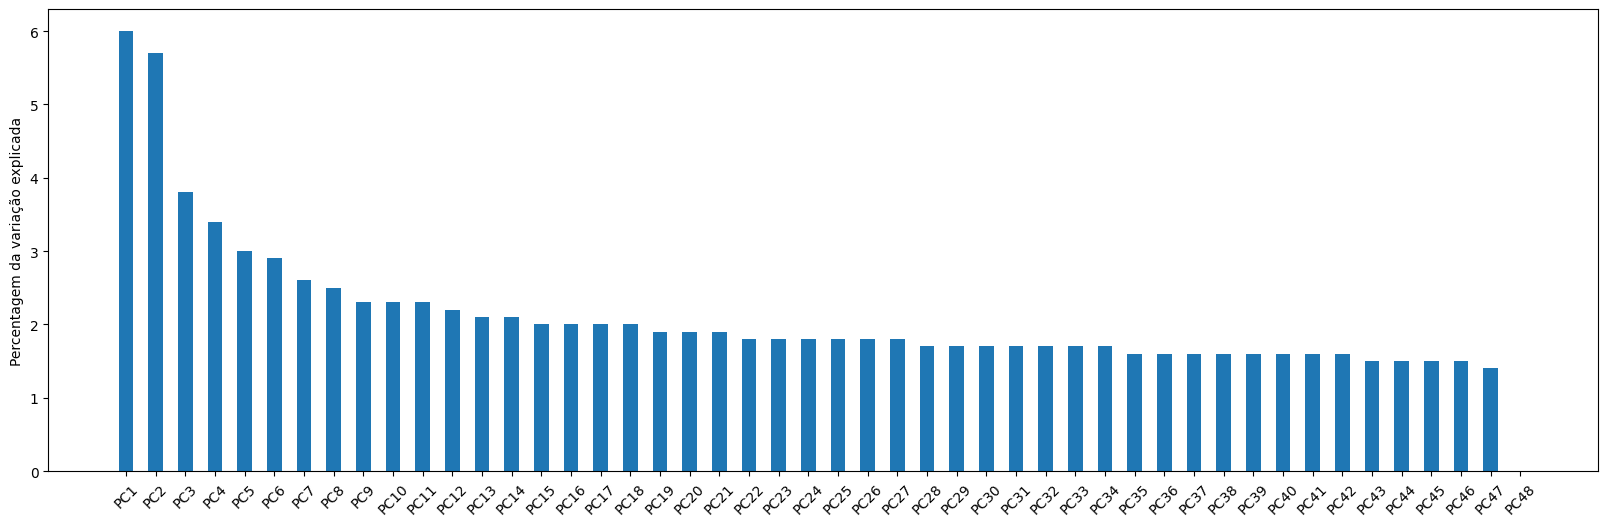

In [10]:
n=48                                                                # existem 48 amostras para proceder à análise
pca = PCA(n_components=n) 
x_reduced = pca.fit(data_scale).transform(data_scale)                                                       # media e desvio                                         # escala
print (pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_[:41]))                          # 90% da variabilidade

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=["PC"+str(x) for x in range(1,len(per_var)+1)]                  
plt.figure(figsize=(20, 6))  # width:20, height:3

plt.bar([x*2 for x in range(1,len(per_var)+1)], height=per_var, align="center", width=1)
plt.ylabel("Percentagem da variação explicada")
plt.xticks([x*2 for x in range(1,len(per_var)+1)], labels, rotation=45)

    
plt.show()


In [11]:
descricao=data.describe()
descricao

,ILMN_1343291,ILMN_1343295,ILMN_1651199,ILMN_1651209,ILMN_1651210,ILMN_1651221,ILMN_1651228,ILMN_1651229,ILMN_1651230,ILMN_1651232,...,ILMN_3311145,ILMN_3311150,ILMN_3311155,ILMN_3311160,ILMN_3311165,ILMN_3311170,ILMN_3311175,ILMN_3311180,ILMN_3311185,ILMN_3311190
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,13.047917,14.441667,7.206250,7.314583,7.302083,7.397917,11.406250,9.845833,7.277083,7.354167,...,7.247917,7.322917,7.293750,7.237500,7.460417,7.241667,7.225000,7.360417,7.220833,7.287500
std,0.245807,0.189998,0.107992,0.092229,0.099978,0.108156,0.362266,0.224042,0.118931,0.109074,...,0.107168,0.127562,0.113749,0.108422,0.128394,0.104847,0.106191,0.116216,0.100970,0.098121
min,12.300000,14.000000,7.000000,7.100000,7.100000,7.200000,10.700000,9.500000,7.000000,7.100000,...,7.000000,7.000000,7.100000,6.900000,7.200000,7.000000,7.000000,7.200000,7.000000,7.100000
25%,12.900000,14.300000,7.200000,7.300000,7.200000,7.300000,11.100000,9.600000,7.200000,7.300000,...,7.200000,7.200000,7.200000,7.200000,7.400000,7.200000,7.200000,7.300000,7.200000,7.200000
50%,13.100000,14.400000,7.200000,7.300000,7.300000,7.400000,11.400000,9.900000,7.300000,7.400000,...,7.250000,7.300000,7.300000,7.200000,7.500000,7.200000,7.200000,7.300000,7.200000,7.300000
75%,13.200000,14.600000,7.200000,7.400000,7.300000,7.500000,11.625000,10.000000,7.325000,7.400000,...,7.300000,7.400000,7.400000,7.300000,7.500000,7.300000,7.300000,7.500000,7.300000,7.400000
max,13.500000,15.000000,7.600000,7.600000,7.600000,7.700000,12.100000,10.500000,7.500000,7.600000,...,7.500000,7.600000,7.500000,7.500000,7.800000,7.500000,7.500000,7.600000,7.500000,7.500000


**SECÇAO 2**

Análise estatística

In [12]:
k=4
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, meta['time'], rownames=['clusters'] )

/home/monica/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


time,hour 1.5,hour 10,hour 24,hour 4
clusters,,,,
0,6,4,2,7
1,6,6,3,5
2,0,1,4,0
3,0,1,3,0


In [7]:
grps=pd.unique(meta["time"].values)
print(grps)

['hour 1.5' 'hour 4' 'hour 10' 'hour 24']


In [9]:
dic={}
for x in datai.index:
    d_data={grp:data[x][meta.time==grp] for grp in grps}
    dic[x]=d_data

In [11]:
import scipy.stats as stats
import statsmodels.api as sum
l=[]
for gene in datai.index:
    fvalue,pvalue=stats.f_oneway(dic[gene]["hour 1.5"],dic[gene]["hour 4"],dic[gene]["hour 10"],dic[gene]["hour 24"])
    if pvalue<0.01:
        l.append((gene,fvalue,pvalue))

In [13]:
print(len(l),"genes")
for g in l:
    print("Gene:",g[0],"T_test:",g[1],"p value:",g[2])

2047 genes
Gene: ILMN_1651278 T_test: 4.7033603707995395 p value: 0.006208380467881729
Gene: ILMN_1651285 T_test: 19.10158730158732 p value: 4.430180483407496e-08
Gene: ILMN_1651628 T_test: 4.705115001716445 p value: 0.00619676382255548
Gene: ILMN_1651767 T_test: 4.306107431935245 p value: 0.009518663894557147
Gene: ILMN_1651964 T_test: 7.102299806040447 p value: 0.0005406932398925152
Gene: ILMN_1652082 T_test: 9.118673647469462 p value: 8.274286617644603e-05
Gene: ILMN_1652085 T_test: 6.302802174822255 p value: 0.0011880482535628662
Gene: ILMN_1652246 T_test: 4.636453689945512 p value: 0.006668616235952555
Gene: ILMN_1652407 T_test: 7.5574963609898 p value: 0.0003492791656555488
Gene: ILMN_1652549 T_test: 5.051134439553 p value: 0.004294037772672882
Gene: ILMN_1652715 T_test: 5.9928315412186315 p value: 0.0016232991408815468
Gene: ILMN_1652749 T_test: 4.821075268817193 p value: 0.005476904620981481
Gene: ILMN_1652790 T_test: 4.403340926347763 p value: 0.008568065348061118
Gene: ILMN_1

**SECÇAO 3**

In [13]:
input_data = data.values
output_data = meta['time'].values
input_sc = preprocessing.scale(input_data)
print(len(input_sc))
indices = np.random.permutation(len(input_data))
indices

train_in = input_sc[indices[:-16]]                #divisao entre dados de treino e dados de teste
train_out = output_data[indices[:-16]]
test_in  = input_sc[indices[-16:]]
test_out = output_data[indices[-16:]]

48


K-neighbors

In [14]:
knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
preds_knn = knn.predict(test_in)
print("Valores previstos: ", preds_knn)
print("Valores reais: " , test_out)
from sklearn.metrics import accuracy_score
accuracy_score(preds_knn, test_out)

Valores previstos:  ['hour 10' 'hour 1.5' 'hour 4' 'hour 1.5' 'hour 10' 'hour 1.5' 'hour 24'
 'hour 24' 'hour 1.5' 'hour 1.5' 'hour 4' 'hour 4' 'hour 1.5' 'hour 1.5'
 'hour 24' 'hour 4']
Valores reais:  ['hour 10' 'hour 10' 'hour 4' 'hour 24' 'hour 10' 'hour 4' 'hour 4'
 'hour 10' 'hour 10' 'hour 1.5' 'hour 24' 'hour 4' 'hour 10' 'hour 1.5'
 'hour 10' 'hour 4']


0.4375

Tree descision

In [15]:
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
preds_tree = tree_model.predict(test_in)

print("Valores previstos: ", preds_tree)
print("Valores reais: " , test_out)
sum(preds_tree == test_out) / len(preds_tree)

Valores previstos:  ['hour 4' 'hour 24' 'hour 24' 'hour 24' 'hour 4' 'hour 24' 'hour 24'
 'hour 10' 'hour 24' 'hour 1.5' 'hour 24' 'hour 24' 'hour 4' 'hour 4'
 'hour 24' 'hour 10']
Valores reais:  ['hour 10' 'hour 10' 'hour 4' 'hour 24' 'hour 10' 'hour 4' 'hour 4'
 'hour 10' 'hour 10' 'hour 1.5' 'hour 24' 'hour 4' 'hour 10' 'hour 1.5'
 'hour 10' 'hour 4']


0.25

SVM

In [16]:
model_svm = svm.SVC(gamma=0.001, C=100.)
model_svm = model_svm.fit(train_in, train_out)
preds_svm = model_svm.predict(test_in)

print("Valores previstos: " , preds_svm)
print("Valores reais: " , test_out)
sum(preds_svm == test_out) / len(preds_svm)

Valores previstos:  ['hour 24' 'hour 1.5' 'hour 24' 'hour 1.5' 'hour 24' 'hour 1.5' 'hour 24'
 'hour 24' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 24' 'hour 1.5' 'hour 24'
 'hour 24' 'hour 24']
Valores reais:  ['hour 10' 'hour 10' 'hour 4' 'hour 24' 'hour 10' 'hour 4' 'hour 4'
 'hour 10' 'hour 10' 'hour 1.5' 'hour 24' 'hour 4' 'hour 10' 'hour 1.5'
 'hour 10' 'hour 4']


0.0625

Comparacao dos modelos

In [17]:
scores_tree = cross_val_score(tree_model, input_sc, output_data, cv = 5)
print(scores_tree)
print(scores_tree.mean())

[0.5        0.6        0.5        0.44444444 0.66666667]
0.5422222222222222


In [18]:
scores_svm = cross_val_score(model_svm, input_sc, output_data, cv = 5)
print(scores_svm)
print(scores_svm.mean())

[0.3        0.1        0.2        0.11111111 0.22222222]
0.1866666666666667


In [19]:
dados=pd.DataFrame(data_scale)